In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

In [ ]:
df=pd.read_csv('/content/deliveries.csv')

In [ ]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


# **Forecasting V. Kohli's Scores.**


---










In [ ]:
#Filtering Data
kohli_scores = df[df["batter"] == "V Kohli"]
kohli_scores

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
132,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,V Kohli,I Sharma,W Jaffer,0,0,0,NaN,0,NaN,NaN,NaN
133,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,V Kohli,I Sharma,W Jaffer,0,4,4,legbyes,0,NaN,NaN,NaN
134,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,V Kohli,I Sharma,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
137,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,1,V Kohli,AB Dinda,W Jaffer,0,0,0,NaN,0,NaN,NaN,NaN
138,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,2,2,V Kohli,AB Dinda,W Jaffer,0,0,0,NaN,1,V Kohli,bowled,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260280,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,6,1,V Kohli,R Ashwin,C Green,1,0,1,NaN,0,NaN,NaN,NaN
260282,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,6,3,V Kohli,R Ashwin,C Green,1,0,1,NaN,0,NaN,NaN,NaN
260286,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,6,7,V Kohli,R Ashwin,C Green,1,0,1,NaN,0,NaN,NaN,NaN
260287,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,7,1,V Kohli,YS Chahal,C Green,0,0,0,NaN,0,NaN,NaN,NaN


In [ ]:
#Grouping and Summing Runs
kohli_matchwise_score = kohli_scores.groupby("match_id")["batsman_runs"].sum().reset_index()
kohli_matchwise_score

,match_id,batsman_runs
0,335982,1
1,335985,23
2,335992,13
3,335996,12
4,335998,1
...,...,...
239,1426290,42
240,1426296,92
241,1426300,27
242,1426306,47


In [ ]:
#Subsetting Data
kohli_matchwise_score_sub = kohli_matchwise_score.head(239)
kohli_matchwise_score_sub

,match_id,batsman_runs
0,335982,1
1,335985,23
2,335992,13
3,335996,12
4,335998,1
...,...,...
234,1426263,3
235,1426268,42
236,1426274,18
237,1426279,51


In [ ]:
#Preparing Data for ARIMA
kohli_matchwise_score_sub["match_number"] = range(len(kohli_matchwise_score_sub))
kohli_matchwise_score_sub.set_index("match_number", inplace=True)

<ipython-input-8-d6582087fe8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kohli_matchwise_score_sub["match_number"] = range(len(kohli_matchwise_score_sub))


In [ ]:
#Fitting the ARIMA Model
model = ARIMA(kohli_matchwise_score_sub["batsman_runs"], order=(1, 1, 1))
model_fit = model.fit()

In [ ]:
#Forecasting Performance
forecast = model_fit.forecast(steps=5)
print(forecast)

239    45.064196
240    44.510021
241    44.497705
242    44.497431
243    44.497425
Name: predicted_mean, dtype: float64


Mean Absolute Error (MAE):  25.49455584853502
Root Mean Squared Error (RMSE):  32.40336358037994


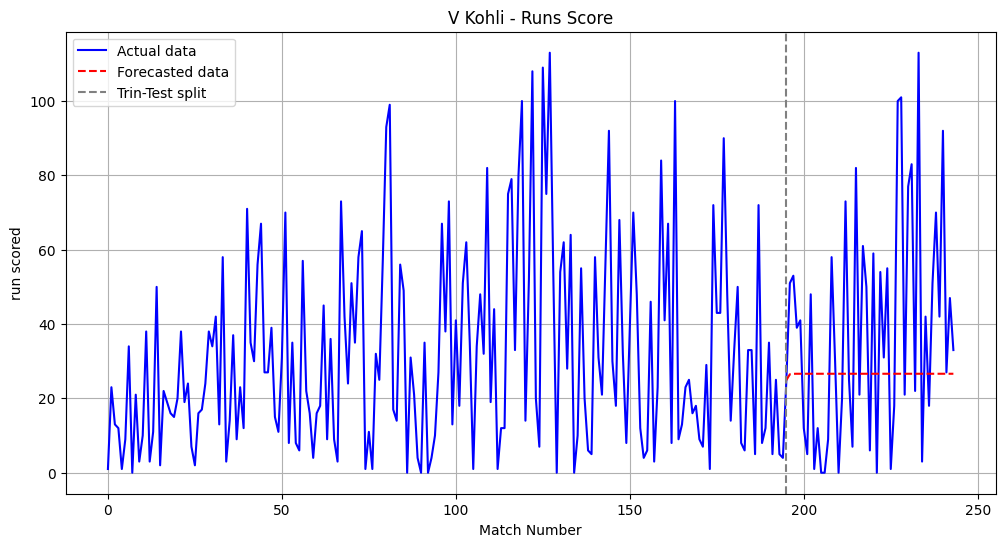

In [ ]:
time_series = kohli_matchwise_score['batsman_runs']
adf_result = adfuller(time_series)

if adf_result[1] >0.05:
  time_series_diff = time_series.diff().dropna()
else:
  time_series_diff = time_series

train_size = int(len(time_series) * 0.8)  # Adjust the split ratio as needed
train, test = time_series[0:train_size], time_series[train_size:len(time_series)]

model = ARIMA(train , order =(1,1,1))
fitted_model = model.fit()

forecast  = fitted_model.forecast(steps =len(test))
forecast.index =test.index
forecast.head(5)

#test = kohli_matchwise_score.head(10)['batsman_runs']
actual_runs = test.values
forecast_runs = forecast.values

mae = np.mean(np.abs(actual_runs - forecast_runs))
print(f"Mean Absolute Error (MAE): ",mae )
rmse  = np.sqrt(np.mean((actual_runs - forecast_runs)**2))
print(f"Root Mean Squared Error (RMSE): ",rmse )

plt.figure(figsize = (12, 6))
plt.plot(time_series_diff, label ="Actual data", color ="blue")
plt.plot(forecast ,label ="Forecasted data" , color="red", linestyle ="--")
plt.axvline(x =test.index[0], color="gray", linestyle = "--",label = "Trin-Test split")
plt.title("V Kohli - Runs Score")
plt.xlabel("Match Number")
plt.ylabel("run scored")
plt.legend()
plt.grid()
plt.show()

# **Forecasting top 5 batsman scores.**

---



In [ ]:
#Runs per Batsman and Match
batsman_scores = df.groupby(['match_id', 'batter']).agg({'batsman_runs': 'sum'}).reset_index()
batsman_scores

,match_id,batter,batsman_runs
0,335982,AA Noffke,9
1,335982,B Akhil,0
2,335982,BB McCullum,158
3,335982,CL White,6
4,335982,DJ Hussey,12
...,...,...,...
16510,1426312,SP Narine,6
16511,1426312,SS Iyer,6
16512,1426312,Shahbaz Ahmed,8
16513,1426312,TM Head,0


In [ ]:
#Total Runs per Batsman
total_runs_per_batsman = batsman_scores.groupby('batter')['batsman_runs'].sum().reset_index()
total_runs_per_batsman = total_runs_per_batsman.sort_values(by='batsman_runs', ascending=False)
total_runs_per_batsman

,batter,batsman_runs
631,V Kohli,8014
512,S Dhawan,6769
477,RG Sharma,6630
147,DA Warner,6567
546,SK Raina,5536
...,...,...
517,S Ladda,0
518,S Lamichhane,0
69,Abdur Razzak,0
565,SS Cottrell,0


In [ ]:
top_5_batsmen = total_runs_per_batsman.head(5)
top_5_batsmen

,batter,batsman_runs
631,V Kohli,8014
512,S Dhawan,6769
477,RG Sharma,6630
147,DA Warner,6567
546,SK Raina,5536


In [ ]:
#Iterating over the Top 5 Batsmen and Printing their Time Series:
for i in range(len(top_5_batsmen)):
    print(top_5_batsmen.iloc[i]["batter"])

    batsman_name = top_5_batsmen.iloc[i]["batter"]
    print(batsman_name)

    batsman_time_series = batsman_scores[batsman_scores["batter"] == batsman_name]
    print(batsman_time_series)

V Kohli
V Kohli
       match_id   batter  batsman_runs
13       335982  V Kohli             1
56       335985  V Kohli            23
168      335992  V Kohli            13
224      335996  V Kohli            12
252      335998  V Kohli             1
...         ...      ...           ...
16197   1426290  V Kohli            42
16300   1426296  V Kohli            92
16367   1426300  V Kohli            27
16434   1426306  V Kohli            47
16479   1426310  V Kohli            33

[244 rows x 3 columns]
S Dhawan
S Dhawan
       match_id    batter  batsman_runs
35       335984  S Dhawan            52
96       335988  S Dhawan            25
204      335995  S Dhawan             0
250      335998  S Dhawan            50
296      336001  S Dhawan            19
...         ...       ...           ...
15425   1422120  S Dhawan            22
15494   1422124  S Dhawan            45
15566   1422129  S Dhawan            70
15660   1422135  S Dhawan             1
15754   1426261  S Dhawan         

In [ ]:
# Prepare match-wise score data for the top 5 batsmen
top_5_batsmen = total_runs_per_batsman.head(5)  # Assuming this already contains top 5 batsmen

# Iterating over the top 5 batsmen
for i in range(len(top_5_batsmen)):
    # Get batsman name
    batsman_name = top_5_batsmen.iloc[i]["batter"]
    print(f"Preparing data for {batsman_name}...\n")

    # Filter data for the current batsman
    batsman_time_series = batsman_scores[batsman_scores["batter"] == batsman_name]
    batsman_time_series = batsman_time_series.groupby("match_id")["batsman_runs"].sum().reset_index()

    # Prepare match-wise data (add match number)
    batsman_time_series["match_number"] = range(len(batsman_time_series))
    batsman_time_series.set_index("match_number", inplace=True)

    # Print the prepared data for the batsman
    print(f"Time series data for {batsman_name}:")
    print(batsman_time_series)
    print("\n" + "-" * 50 + "\n")


Preparing data for V Kohli...

Time series data for V Kohli:
              match_id  batsman_runs
match_number                        
0               335982             1
1               335985            23
2               335992            13
3               335996            12
4               335998             1
...                ...           ...
239            1426290            42
240            1426296            92
241            1426300            27
242            1426306            47
243            1426310            33

[244 rows x 2 columns]

--------------------------------------------------

Preparing data for S Dhawan...

Time series data for S Dhawan:
              match_id  batsman_runs
match_number                        
0               335984            52
1               335988            25
2               335995             0
3               335998            50
4               336001            19
...                ...           ...
216            1422120

In [ ]:
# Iterate over the top 5 batsmen
for i in range(len(top_5_batsmen)):
    # Get batsman name
    batsman_name = top_5_batsmen.iloc[i]["batter"]
    print(f"Fitting ARIMA model for {batsman_name}...\n")

    # Filter data for the batsman and prepare time series
    batsman_time_series = batsman_scores[batsman_scores["batter"] == batsman_name]
    batsman_time_series = batsman_time_series.groupby("match_id")["batsman_runs"].sum().reset_index()

    # Add match number for time series indexing
    batsman_time_series["match_number"] = range(len(batsman_time_series))
    batsman_time_series.set_index("match_number", inplace=True)

    # Fit the ARIMA model
    try:
        model = ARIMA(batsman_time_series["batsman_runs"], order=(1, 1, 1))
        model_fit = model.fit()

        # Forecast performance for the next 5 matches
        forecast = model_fit.forecast(steps=5)

        # Print results
        print(f"Forecast for {batsman_name}:")
        print(forecast)
        print("\n" + "-" * 50 + "\n")
    except Exception as e:
        print(f"Could not fit ARIMA model for {batsman_name}. Error: {e}")
        print("\n" + "-" * 50 + "\n")


Fitting ARIMA model for V Kohli...

Forecast for V Kohli:
244    45.293208
245    45.455884
246    45.458036
247    45.458065
248    45.458065
Name: predicted_mean, dtype: float64

--------------------------------------------------

Fitting ARIMA model for S Dhawan...

Forecast for S Dhawan:
221    34.077027
222    32.753423
223    32.840684
224    32.834931
225    32.835310
Name: predicted_mean, dtype: float64

--------------------------------------------------

Fitting ARIMA model for RG Sharma...

Forecast for RG Sharma:
251    21.679478
252    26.945314
253    26.346680
254    26.414734
255    26.406998
Name: predicted_mean, dtype: float64

--------------------------------------------------

Fitting ARIMA model for DA Warner...

Forecast for DA Warner:
184    30.375157
185    29.294774
186    29.334510
187    29.333048
188    29.333102
Name: predicted_mean, dtype: float64

--------------------------------------------------

Fitting ARIMA model for SK Raina...

Forecast for SK Raina

# **Top 10 Batsmen based on Strike Rate:**

In [ ]:
#Top 10 Batsmen based on Strike Rate:
# Assuming df is your DataFrame
batsman_stats = df.groupby('batter').agg(
    total_runs=pd.NamedAgg(column='batsman_runs', aggfunc='sum'),
    balls_faced=pd.NamedAgg(column='ball', aggfunc='count')  # Total balls faced by each batsman
).reset_index()

batsman_stats['strike_rate'] = (batsman_stats['total_runs'] / batsman_stats['balls_faced']) * 100

top_10_batsmen = batsman_stats.sort_values(by='strike_rate', ascending=False).head(10)

# Displaying the top 10 batsmen names
top_10_batsmen_names = top_10_batsmen['batter']
print("Top 10 Batsmen based on Strike Rate:")
print(top_10_batsmen_names)

# ARIMA model for forecasting (if needed)
model = ARIMA(top_10_batsmen['strike_rate'], order=(1,1,1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=10)
print("\nForecast for next 10 steps:")
print(forecast)


Top 10 Batsmen based on Strike Rate:
312             L Wood
97          B Stanlake
234    J Fraser-McGurk
461      R Sai Kishore
629           Umar Gul
497           RS Sodhi
583      Shahid Afridi
222         I Malhotra
652           WG Jacks
433            PD Salt
Name: batter, dtype: object


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin


Forecast for next 10 steps:
10    166.980107
11    164.768771
12    162.909655
13    161.346656
14    160.032609
15    158.927863
16    157.999078
17    157.218229
18    156.561753
19    156.009840
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


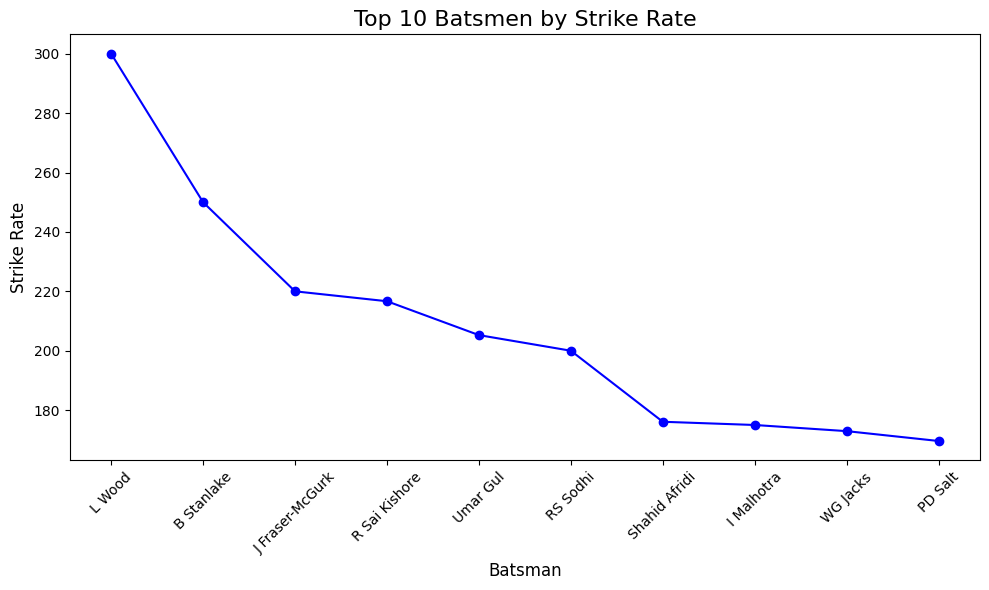

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(top_10_batsmen['batter'], top_10_batsmen['strike_rate'], marker='o', linestyle='-', color='b')
plt.title('Top 10 Batsmen by Strike Rate', fontsize=16)
plt.xlabel('Batsman', fontsize=12)
plt.ylabel('Strike Rate', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()